In [1]:
import bs4 as bs 
import urllib.request
import nltk
import spacy

In [2]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=9075fd04ef3c3cda3dfb1bce59c9bfa492530d9d88a2af458cb46c593756e38a
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ly3hn3_/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


# POS

In [3]:
nlp = spacy.load("pt")

In [4]:
doc = nlp("Teste testando palavras aleatorias para testar o nlp e testar coisas e testar realizado em Fortaleza")

In [5]:
for token in doc:
  print(token.text, token.pos_) # .pos indica a classe gramatical das palavras

Teste AUX
testando VERB
palavras NOUN
aleatorias ADJ
para ADP
testar VERB
o DET
nlp PROPN
e CCONJ
testar VERB
coisas NOUN
e CCONJ
testar VERB
realizado VERB
em ADP
Fortaleza PROPN


# Lematização

In [6]:
for token in doc:
  print(token.text, token.lemma_)

Teste Teste
testando testar
palavras palavra
aleatorias aleatorias
para parir
testar testar
o o
nlp nlp
e e
testar testar
coisas coisa
e e
testar testar
realizado realizar
em em
Fortaleza Fortaleza


# Stemização

In [7]:
nltk.download("rslp")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [8]:
stemmer = nltk.stem.RSLPStemmer()

In [9]:
for token in doc:
  print(f"Original: {token.text}, Lemma: {token.lemma_}, Stem: {stemmer.stem(token.text)}")

Original: Teste, Lemma: Teste, Stem: test
Original: testando, Lemma: testar, Stem: test
Original: palavras, Lemma: palavra, Stem: palavr
Original: aleatorias, Lemma: aleatorias, Stem: aleat
Original: para, Lemma: parir, Stem: par
Original: testar, Lemma: testar, Stem: test
Original: o, Lemma: o, Stem: o
Original: nlp, Lemma: nlp, Stem: nlp
Original: e, Lemma: e, Stem: e
Original: testar, Lemma: testar, Stem: test
Original: coisas, Lemma: coisa, Stem: cois
Original: e, Lemma: e, Stem: e
Original: testar, Lemma: testar, Stem: test
Original: realizado, Lemma: realizar, Stem: realiz
Original: em, Lemma: em, Stem: em
Original: Fortaleza, Lemma: Fortaleza, Stem: fortal


# Carregamento dos textos



In [10]:
text = urllib.request.urlopen("https://en.wikipedia.org/wiki/Natural_language_processing")

In [11]:
text = text.read()

In [12]:
text # em html

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Natural language processing - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ee1579d5-3138-43be-a47f-ef8d7df523ca","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1071698711,"wgRevisionId":1071698711,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 maint: location","Articles with short description","Short description matches 

In [13]:
text_html = bs.BeautifulSoup(text, "lxml")

In [14]:
text_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Natural language processing - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ee1579d5-3138-43be-a47f-ef8d7df523ca","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1071698711,"wgRevisionId":1071698711,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 maint: location","Articles with short description","Short description matches Wikidat

In [15]:
paragrafos = text_html.find_all("p")
links = text_html.find_all("a")

In [16]:
paragrafos

[<p><b>Natural language processing</b> (<b>NLP</b>) is a subfield of <a href="/wiki/Linguistics" title="Linguistics">linguistics</a>, <a href="/wiki/Computer_science" title="Computer science">computer science</a>, and <a href="/wiki/Artificial_intelligence" title="Artificial intelligence">artificial intelligence</a> concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of <a href="/wiki/Natural_language" title="Natural language">natural language</a> data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
 </p>,
 <p>Challenges in natural language processing frequently involve <a href="/wiki/Speech_recognition" title="Speech recognition">speech recognition

In [17]:
links

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/Language_processing_in_the_brain" title="Language processing in the brain">Language processing in the brain</a>,
 <a class="image" href="/wiki/File:Automated_online_assistant.png"><img alt="" class="thumbimage" data-file-height="501" data-file-width="400" decoding="async" height="251" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Automated_online_assistant.png/200px-Automated_online_assistant.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Automated_online_assistant.png/300px-Automated_online_assistant.png 1.5x, //upload.wikimedia.org/wikipedia/commons/8/8b/Automated_online_assistant.png 2x" width="200"/></a>,
 <a class="internal" href="/wiki/File:Automated_online_assistant.png" title="Enlarge"></a>,
 <a class="mw-redirect" href="/wiki/Automated_online_assistant" title="Automated online assistant

In [18]:
texto_completo = ""

for token in paragrafos:
  texto_completo = texto_completo + token.text

In [19]:
texto_completo #conteudo

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articul

# Busca de textos

In [20]:
nlp = spacy.load("en")

In [21]:
alvo = "computer"
token_alvo = nlp(alvo)

In [22]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add("busca", None, token_alvo)

In [23]:
doc_pesquisa = nlp(texto_completo.lower())

In [24]:
matches = matcher(doc_pesquisa)
matches

[(5048767159462669254, 12, 13),
 (5048767159462669254, 50, 51),
 (5048767159462669254, 227, 228),
 (5048767159462669254, 605, 606)]

In [25]:
doc_pesquisa[12:13]

computer

# Extração de Entidades

In [26]:
for entidades in doc_pesquisa.ents:
  print(entidades.text, entidades.label_)

nlp ORG
the 1950s DATE
1950 DATE
alan turing PERSON
nlp ORG
john searle's PERSON
chinese NORP
chinese NORP
nlp ORG
up to the 1980s DATE
the late 1980s DATE
the 2010s DATE
nlp helps analyze ORG
the early days DATE
the late 1980s and mid-1990s DATE
embeddings,[17 DATE
one CARDINAL
markov PERSON
cache language PRODUCT
nlp research ORG
2015,[19 CARDINAL
nlp ORG
nlp ORG
2020 DATE
three CARDINAL
nlp ORG
emulate ORG
one CARDINAL
nlp ORG
george lakoff PERSON
nlp ORG
two CARDINAL
nlp ORG
the 1990s DATE
nlp ORG
nlp ORG
cognitive ai".[46] likewise, ideas of cognitive nlp WORK_OF_ART
nlp ORG


In [27]:
from spacy import displacy
displacy.render(doc_pesquisa, style = "ent", jupyter = True)

# Nuvem de Palavras

In [28]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['black', 'blue', 'yellow', 'magenta'])

In [29]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)

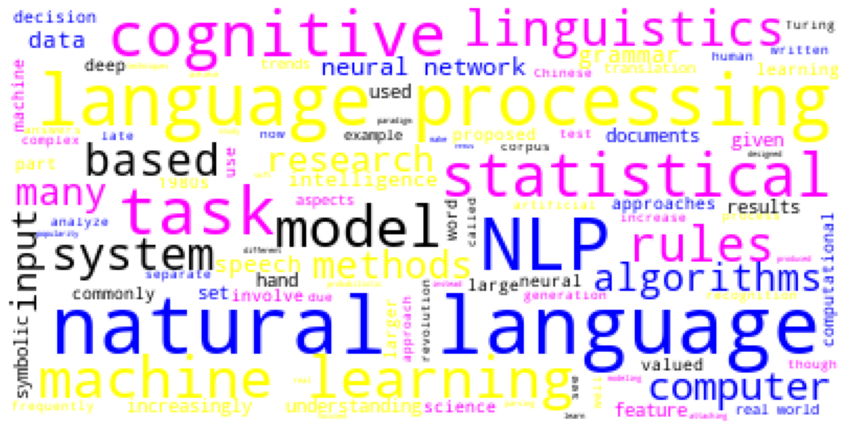

In [30]:
import matplotlib.pyplot as plt
cloud = cloud.generate(texto_completo)
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Stop Words

tirar palavras indesejadas da Nuvem de Palavras

In [31]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'a', 'may', 'behind', 'fifteen', 'should', 'them', 'the', 'whole', 'thru', 'enough', 'wherein', 're', 'before', 'but', 'ours', 'toward', 'every', 'made', 'move', 'by', "'ll", 'go', 'afterwards', 'ever', 'sixty', 'below', 'call', 'onto', 'still', 'nine', 'latterly', 'myself', 'already', 'just', 'bottom', 'amount', 'anyhow', 'perhaps', 'n‘t', 'thus', 'too', 'do', 'might', 'now', 'me', 'as', '‘ll', 'no', 'have', 'used', "'re", 'due', 'somewhere', 'everywhere', 'many', 'forty', 'empty', 'please', '‘ve', 'n’t', 'therein', 'to', 'amongst', 'nobody', 'would', 'various', 'almost', 'yourself', 'thereby', 'against', 'name', 'part', 'along', 'could', 'with', 'hundred', '’m', 'thence', 'after', 'beside', 'those', 'which', 'namely', 'he', 'my', 'beyond', 'will', 'being', 'alone', 'i', 'via', 'itself', 'then', 'until', 'same', 'ourselves', 'all', 'one', '‘re', 'sometime', 'six', 'us', 'themselves', 'otherwise', 'something', 'two', 'these', 'among', 'became', 'hence', 'again', 'seem', 'doing', 'you'

In [33]:
doc = nlp(texto_completo)
lista_texto = []
for token in doc:
  lista_texto.append(token.text)

In [34]:
lista_stop = []

for palavra in lista_texto:
  if nlp.vocab[palavra].is_stop == False:
    lista_stop.append(palavra)

In [35]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['black', 'blue', 'yellow', 'magenta'])

In [36]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)

In [38]:
string_lista_stop = " ".join(lista_stop) # para transformar array em string

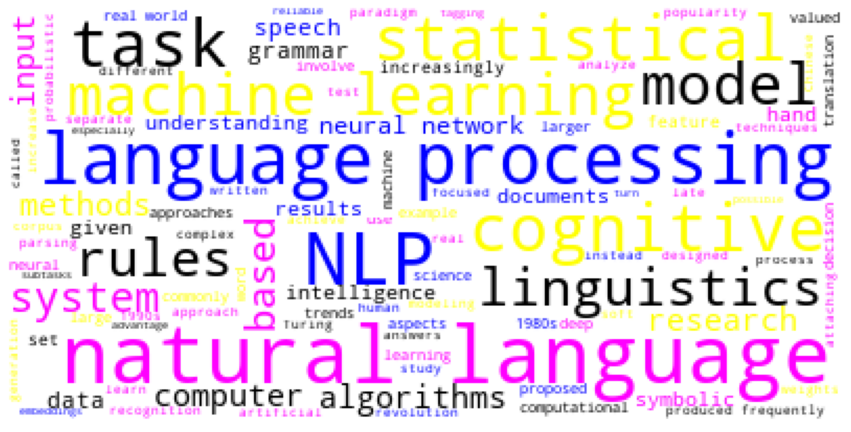

In [39]:
import matplotlib.pyplot as plt
cloud = cloud.generate(string_lista_stop) # modificado para lista_stop
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Classificação de Sentimentos spacy1

Importação

In [40]:
!pip install spacy==2.2.3

     |████████████████████████████████| 10.4 MB 10.6 MB/s 
     |████████████████████████████████| 2.2 MB 60.5 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [41]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [42]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carregamento dos Dados

In [45]:
base_dados = pd.read_csv("/content/base_treinamento.txt", encoding = "utf-8")

In [46]:
base_dados.shape

(196, 2)

In [47]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [48]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


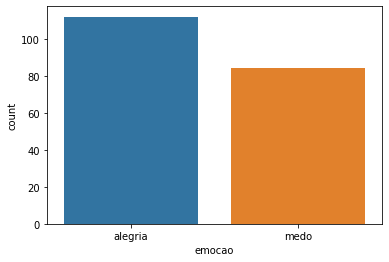

In [50]:
sns.countplot(base_dados['emocao'], label = "Contagem");